In [50]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs, make_circles, make_moons, load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Make dataset

In [7]:
x, y = make_moons(n_samples=1000, noise=0.1, random_state=42)
x.shape, y.shape

((1000, 2), (1000,))

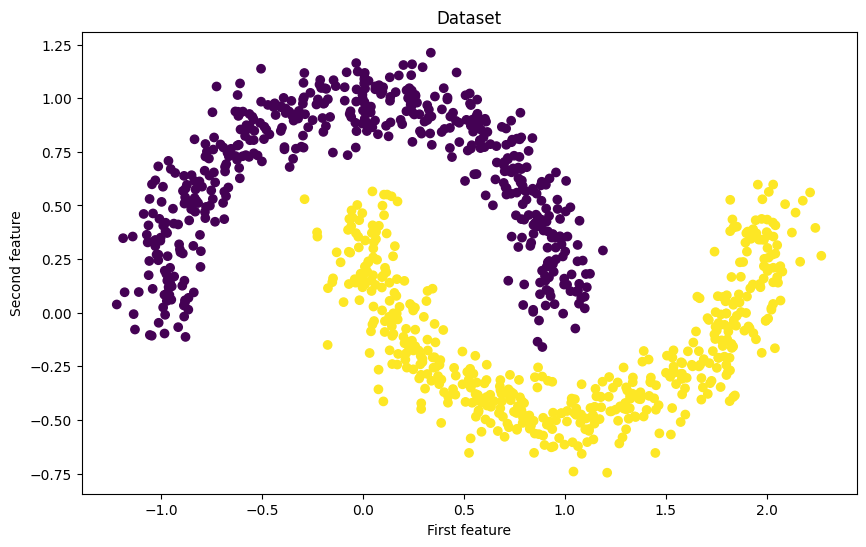

In [8]:
fig = plt.figure(figsize=(10, 6))

plt.scatter(x[:, 0], x[:, 1], c=y)

plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature");

In [9]:
x, y = make_circles(n_samples=1000, noise=0.05, factor=0.5, random_state=42)
x.shape, y.shape

((1000, 2), (1000,))

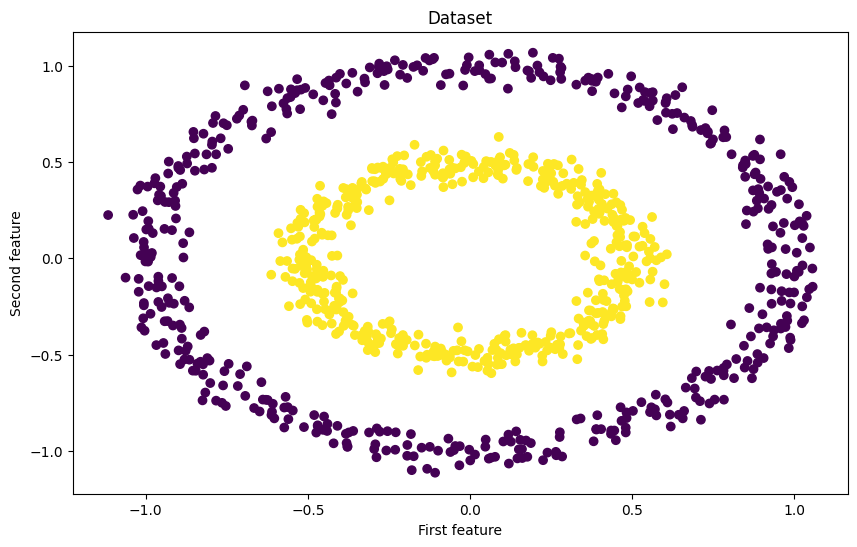

In [10]:
fig = plt.figure(figsize=(10, 6))

plt.scatter(x[:, 0], x[:, 1], c=y)

plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature");

In [25]:
x, y = make_blobs(n_samples=1000, centers=2, random_state=4)
x.shape, y.shape

((1000, 2), (1000,))

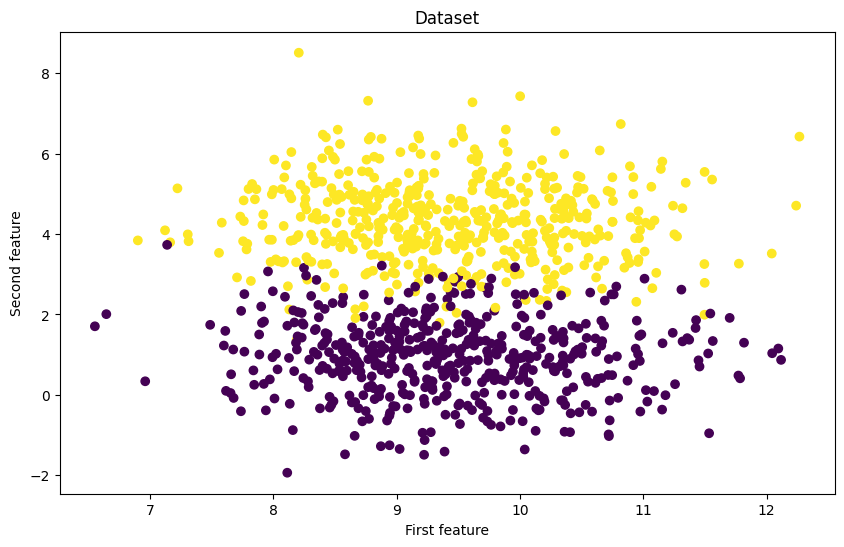

In [26]:
fig = plt.figure(figsize=(10, 6))

plt.scatter(x[:, 0], x[:, 1], c=y)

plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature");

In [27]:
# y = y[:, np.newaxis]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
    
print(f'Shape x_train: {x_train.shape}')
print(f'Shape y_train: {y_train.shape}')
print(f'Shape x_test: {x_test.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape x_train: (750, 2)
Shape y_train: (750,)
Shape x_test: (250, 2)
Shape y_test: (250,)


### Logistic regression (Sklearn)

In [28]:
model = LogisticRegression()

In [29]:
model.fit(x_train, y_train)

LogisticRegression()

In [30]:
preds = model.predict(x_test)

In [31]:
preds, y_test

(array([0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
        0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
        1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
        1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
        1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
        1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
        1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
        0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
        0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
        1, 1, 1, 0, 1, 1, 0, 1]),
 array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
        0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
    

In [32]:
model.score(x_train, y_train)

0.9573333333333334

In [34]:
np.sum(preds == y_test) / y_test.shape[0]

0.972

In [33]:
accuracy_score(y_test, preds)

0.972

### Logistic regression from scratch

In [35]:
class MyLogisticRegression:
    
    def __init__(self, learning_rate=0.01, num_iterations=1000, verbose=False):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.verbose = verbose
    
    def _sigmoid(self, z):
        # this is our actual sigmoid function which predicts our yp
        return 1 / (1 + np.exp(-z))
    
    def _loss(self, yp, y):
        return (-y * np.log(yp) - (1 - y) * np.log(1 - yp)).mean()
    
    def fit(self, x, y):
        intercept = np.ones((x.shape[0], 1))
        x = np.concatenate((intercept, x), axis=1)
        
        self.w = np.zeros(x.shape[1])
        
        self._costs = []
        
        for i in range(self.num_iterations):
            
            yp = self._sigmoid(x @ self.w)
            
            gradient = (x.T @ (yp - y)) / y.shape[0]
            
            self.w -= self.learning_rate * gradient
            
            yp = self._sigmoid(x @ self.w)
            
            loss = self._loss(yp, y)
            self._costs.append(loss)
            
            if(self.verbose == True and i % 100 == 0):
                print(f'loss: {loss} \t')
    
    def get_costs(self):
        return np.array(self._costs)
    
    def predict_prob(self, x):
        intercept = np.ones((x.shape[0], 1))
        x = np.concatenate((intercept, x), axis=1)
        return self._sigmoid(x @ self.w)
    
    def predict(self, x):
        return self.predict_prob(x).round()

In [36]:
log_reg = MyLogisticRegression()

In [37]:
log_reg.fit(x_train, y_train)

In [38]:
p_probs = log_reg.predict_prob(x_test)
p_probs.round(3)

array([0.052, 0.299, 0.061, 0.997, 0.077, 0.333, 0.007, 0.994, 0.067,
       0.042, 0.901, 0.99 , 0.859, 0.977, 0.903, 0.938, 0.023, 0.211,
       0.565, 0.046, 0.975, 0.949, 0.233, 0.949, 0.019, 0.967, 0.984,
       0.021, 0.98 , 0.747, 0.723, 0.02 , 0.447, 0.063, 0.886, 0.084,
       0.117, 0.984, 0.235, 0.043, 0.032, 0.185, 0.009, 0.055, 0.863,
       0.931, 0.996, 0.162, 0.868, 0.761, 0.37 , 0.969, 0.971, 0.998,
       0.003, 0.985, 0.015, 0.019, 0.642, 0.001, 0.918, 0.026, 0.961,
       0.906, 0.124, 0.011, 0.989, 0.022, 0.918, 0.872, 0.119, 0.79 ,
       0.006, 0.974, 0.998, 0.614, 0.958, 0.856, 0.975, 0.906, 0.816,
       0.992, 0.995, 0.002, 0.527, 0.98 , 0.749, 0.009, 1.   , 0.58 ,
       0.855, 0.022, 0.938, 0.988, 0.998, 0.04 , 0.002, 1.   , 0.014,
       0.097, 0.527, 0.998, 0.977, 0.955, 0.974, 0.025, 0.702, 0.086,
       0.984, 0.987, 0.999, 0.995, 0.954, 0.869, 0.093, 0.971, 0.101,
       0.945, 0.001, 0.047, 0.998, 0.988, 0.09 , 0.697, 0.634, 0.2  ,
       0.129, 0.307,

In [39]:
p = log_reg.predict(x_test)
p

array([0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1.,
       0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 1.

In [40]:
np.sum(y_test == p) / y_test.shape[0]

0.968

In [41]:
log_reg.get_costs()

array([0.68686466, 0.68074448, 0.67476088, 0.66889834, 0.66314719,
       0.65750111, 0.65195574, 0.64650781, 0.64115471, 0.63589418,
       0.63072422, 0.62564295, 0.62064858, 0.61573937, 0.61091365,
       0.60616977, 0.60150612, 0.59692109, 0.59241315, 0.58798075,
       0.58362239, 0.57933658, 0.57512187, 0.57097684, 0.56690008,
       0.56289021, 0.55894588, 0.55506577, 0.55124859, 0.54749304,
       0.54379789, 0.54016192, 0.53658391, 0.53306271, 0.52959715,
       0.52618612, 0.5228285 , 0.51952322, 0.51626923, 0.51306548,
       0.50991097, 0.50680471, 0.50374573, 0.50073308, 0.49776583,
       0.49484308, 0.49196394, 0.48912754, 0.48633304, 0.48357961,
       0.48086644, 0.47819274, 0.47555772, 0.47296065, 0.47040076,
       0.46787735, 0.4653897 , 0.46293712, 0.46051893, 0.45813448,
       0.45578312, 0.45346422, 0.45117715, 0.44892132, 0.44669614,
       0.44450103, 0.44233542, 0.44019876, 0.43809052, 0.43601017,
       0.43395719, 0.43193107, 0.42993134, 0.42795749, 0.42600

Text(0, 0.5, 'Cost')

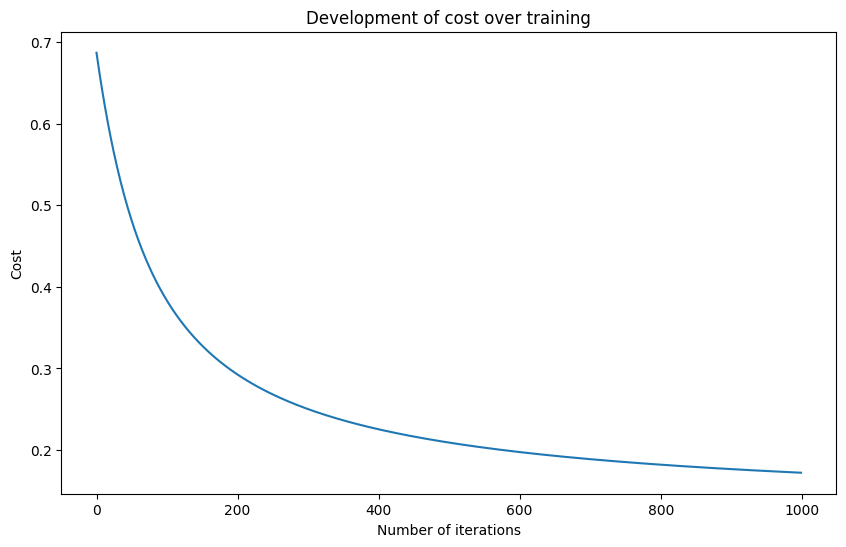

In [42]:
fig = plt.figure(figsize=(10, 6))

plt.plot(np.arange(1000), log_reg.get_costs())

plt.title("Development of cost over training")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")

In [43]:
y_p_train = log_reg.predict(x_train)
y_p_test = log_reg.predict(x_test)

print(f"train accuracy: {100 - np.mean(np.abs(y_p_train - y_train)) * 100}%")
print(f"test accuracy: {100 - np.mean(np.abs(y_p_test - y_test))}%")

train accuracy: 94.93333333333334%
test accuracy: 99.968%


### K- Fold Cross Validation

In [45]:
from sklearn.model_selection import KFold

In [46]:
scores = []
best_svr = LogisticRegression()
cv = KFold(n_splits=10, random_state=42, shuffle=True)
for train_index, test_index in cv.split(x):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    x_train, x_test, y_train, y_test = x[train_index], x[test_index], y[train_index], y[test_index]
    best_svr.fit(x_train, y_train)
    scores.append(best_svr.score(x_test, y_test))

Train Index:  [  0   1   2   3   4   5   6   7   8   9  11  12  13  14  15  16  17  18
  19  20  21  22  24  25  26  27  28  29  31  32  33  34  35  36  37  38
  40  41  42  43  44  45  46  47  48  49  50  51  52  53  55  56  57  58
  60  61  62  64  65  68  69  71  72  73  74  75  77  78  79  80  81  82
  83  84  85  86  87  89  90  91  92  93  94  95  97  98  99 100 102 103
 104 105 106 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 137 138 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 199 200 201 202 203 204 205 206 207 208 211 212 213 214 215 216 217 219
 220 222 223 224 225 226 227 228 229 230 231 232 233 234 236 237 238 239
 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257
 258 259 260 262 263 264 265 266 267 

In [47]:
scores

[0.94, 1.0, 0.96, 0.96, 0.96, 0.95, 0.97, 1.0, 0.93, 0.94]

In [48]:
scores = np.mean(scores)

In [49]:
scores

0.961

## IRIS

In [51]:
d = load_iris()
d

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [53]:
d.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])